In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [8]:
# Load data

def load_list(filename):
    vocabulary = []
    with open(filename, 'r') as f:
        for l in f:
            vocabulary.append(l.strip())
    return np.asarray(vocabulary)

def load_csv(filename):
    import csv
    
    sentence = []
    with open(filename, 'r') as csvfile:
        reader = csv.reader(csvfile)
        for row in reader:
            sentence.append(str(row))
    return np.asarray(sentence).flatten()
    
import pickle

def save_pickle(path, X):
    with open(path, 'wb') as f:
        pickle.dump(X, f)
def open_pickle(path):
    with open(path, 'rb') as f:
        X = pickle.load(f)
    return X

X_train_sent = open_pickle('./sentence_data/imdb_sentence_xtrain.pickle')
X_test_sent = open_pickle('./sentence_data/imdb_sentence_xtest.pickle')
y_train = open_pickle('./sentence_data/imdb_sentence_ytrain.pickle')
y_test = open_pickle('./sentence_data/imdb_sentence_ytest.pickle')

In [9]:
X = np.hstack((X_train_sent, X_test_sent))
y = np.hstack((y_train, y_test))
# X.shape
y.shape

(2000,)

In [10]:
X_rel = X[y==1]
X_unrel = X[y==0]

X_rel.shape

(1000,)

In [11]:
X_rel_sent = np.zeros(len(X_rel))
X_unrel_sent = np.zeros(len(X_unrel))

for i in range(len(X_rel_sent)):
    X_rel_sent[i] = len(X_rel[i].split())

for i in range(len(X_unrel_sent)):
    X_unrel_sent[i] = len(X_unrel[i].split())

def print_word_stat(title, X):
    print()
    print('--', title, 'Statistics --')

    print('Total sentences ', len(X))
    print('Max \t: ', int(np.max(X)))
    print('Min \t: ', int(np.min(X)))
    print('Mean \t: ', int(np.mean(X)))
    print('Median \t: ', int(np.median(X)))
    print()

# print_word_stat('Whole corpus', X_sent_len)
print_word_stat('Related Sentence', X_rel_sent)
print_word_stat('Unrelated Sentence', X_unrel_sent)



-- Related Sentence Statistics --
Total sentences  1000
Max 	:  84
Min 	:  1
Mean 	:  15
Median 	:  13


-- Unrelated Sentence Statistics --
Total sentences  1000
Max 	:  109
Min 	:  1
Mean 	:  17
Median 	:  15



In [12]:
from sklearn.feature_extraction.text import CountVectorizer

token = r"(?u)\b[\w\'/]+\b"
tf_vectorizer = CountVectorizer(lowercase=True, max_df=1.0, min_df=1, binary=True, token_pattern=token)
tf_vectorizer.set_params(ngram_range=(1,1))

X_train = tf_vectorizer.fit_transform(X_train_sent)
X_test = tf_vectorizer.transform(X_test_sent)

# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y, test_size=0.33, random_state=42)

In [13]:
words = tf_vectorizer.get_feature_names()
print(len(words))
# print(words[500:600])

4532


In [14]:
print(y_train.shape)
print(y_test.shape)

(1333,)
(667,)


In [15]:
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train, random_state=42)
X_test, y_test = shuffle(X_test, y_test, random_state=42)

In [16]:
def lr_classifier_report(X_tr, y_tr, X_te, y_te, random_state=42, C=1.0):
    from sklearn.linear_model import LogisticRegression
    from sklearn.metrics import precision_recall_curve
    from sklearn.metrics import average_precision_score
    from sklearn.metrics import roc_curve, auc
    from sklearn.metrics import classification_report
    import matplotlib.pyplot as plt

    clf = LogisticRegression(random_state=random_state, C=C)
    clf.fit(X_tr, y_tr)

    y_predict = clf.predict(X_te)

    print('--------------')
    print('C=%.2f' %(C))
    print('--------------')
    print('Accuracy')
    print('Train:\t%.5f ' %(clf.score(X_tr, y_tr)))
    print('Test:\t%.5f ' %(clf.score(X_te, y_te)))
    
    print(classification_report(y_te,y_predict))
    #############################################################################
    y_score = clf.decision_function(X_te)
    
    precision, recall, _ = precision_recall_curve(y_te, y_score)
    average_precision = average_precision_score(y_te, y_score)
    
    plt.step(recall, precision, color='b', alpha=0.2, where='post')
    plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')

    
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(
          average_precision))
    plt.show()
    plt.clf()
    
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_te, y_score)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    
    plt.title('Receiver Operating Characteristic')
    plt.plot(false_positive_rate, true_positive_rate, 'b',
    label='AUC = %0.2f'% roc_auc)
    plt.legend(loc='lower right')
    plt.plot([0,1],[0,1],'r--')
    plt.xlim([-0.1,1.2])
    plt.ylim([-0.1,1.2])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    
    return clf

--------------
C=1.00
--------------
Accuracy
Train:	0.98575 
Test:	0.75562 
             precision    recall  f1-score   support

        0.0       0.80      0.73      0.76       363
        1.0       0.71      0.79      0.75       304

avg / total       0.76      0.76      0.76       667



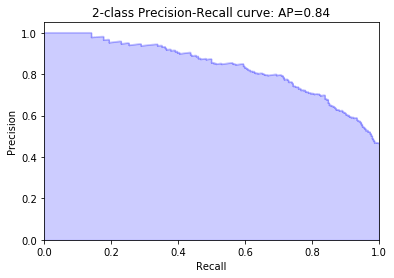

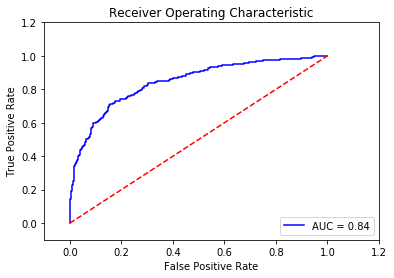

In [17]:
clf1 = lr_classifier_report(X_train, y_train, X_test, y_test, C=1.0)

--------------
C=0.10
--------------
Accuracy
Train:	0.88897 
Test:	0.75862 
             precision    recall  f1-score   support

        0.0       0.80      0.74      0.77       363
        1.0       0.71      0.79      0.75       304

avg / total       0.76      0.76      0.76       667



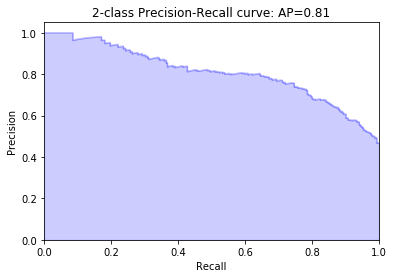

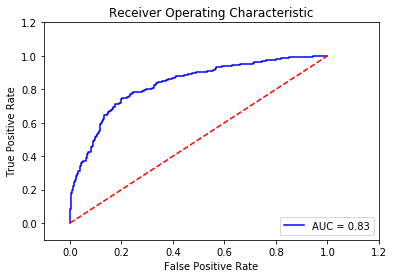

In [18]:
clf2 = lr_classifier_report(X_train, y_train, X_test, y_test, C=0.1)

--------------
C=0.01
--------------
Accuracy
Train:	0.76819 
Test:	0.69415 
             precision    recall  f1-score   support

        0.0       0.77      0.63      0.69       363
        1.0       0.64      0.77      0.70       304

avg / total       0.71      0.69      0.69       667



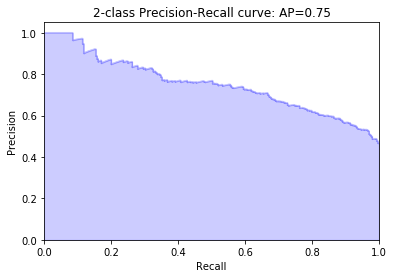

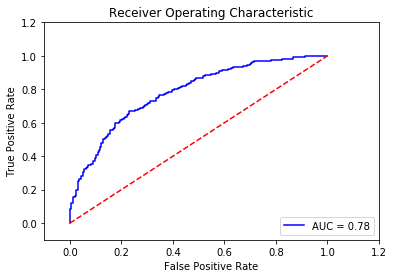

In [19]:
clf3 = lr_classifier_report(X_train, y_train, X_test, y_test, C=0.01)

--------------
C=0.00
--------------
Accuracy
Train:	0.70893 
Test:	0.63268 
             precision    recall  f1-score   support

        0.0       0.81      0.42      0.56       363
        1.0       0.56      0.88      0.69       304

avg / total       0.70      0.63      0.62       667



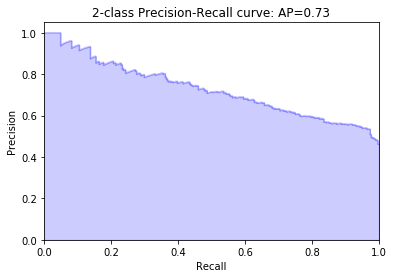

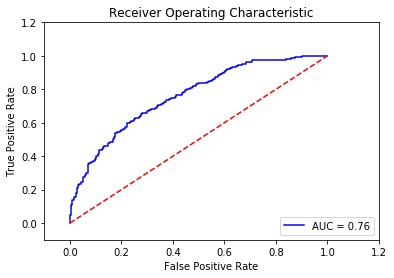

In [20]:
clf3 = lr_classifier_report(X_train, y_train, X_test, y_test, C=0.001)

In [21]:
weights = clf3.coef_.flatten()


def negative_positive_counts(X, y, word_index):
    neg_count = np.sum(X[y==0, word_index])
    pos_count = np.sum(X[y==1, word_index])    
    return neg_count, pos_count

In [22]:
not_related_indices = np.argsort(weights)
related_indices = not_related_indices[::-1]

print("word\tweight\trelated\tunrelated")
for i in not_related_indices[:10]:
    unrel_cnt, rel_cnt = negative_positive_counts(X_train, y_train, i)
    print("%s\t%0.2f\t%d\t%d" %(words[i], weights[i], rel_cnt, unrel_cnt))

word	weight	related	unrelated
in	-0.04	108	178
to	-0.03	158	209
he	-0.02	11	59
on	-0.02	55	92
who	-0.02	23	61
the	-0.02	331	353
when	-0.02	18	50
into	-0.01	5	32
his	-0.01	21	45
from	-0.01	28	50


In [23]:
print("word\t\tweight\trelated\tunrelated")
for i in related_indices[:30]:
    unrel_cnt, rel_cnt = negative_positive_counts(X_train, y_train, i)
    print("%s\t\t%0.2f\t%d\t%d" %(words[i], weights[i], rel_cnt, unrel_cnt))

word		weight	related	unrelated
this		0.07	281	124
movie		0.05	184	67
is		0.05	281	160
film		0.03	136	63
it		0.03	185	122
good		0.01	43	11
very		0.01	39	8
great		0.01	35	9
but		0.01	79	51
all		0.01	60	34
ever		0.01	31	6
watch		0.01	32	9
was		0.01	117	90
that		0.01	126	100
i		0.01	215	184
one		0.01	68	47
acting		0.01	19	2
recommend		0.01	17	0
worst		0.01	19	2
bad		0.01	23	6
actor		0.01	17	1
worth		0.01	16	0
best		0.01	24	8
most		0.01	22	7
well		0.01	22	7
scene		0.01	23	8
seen		0.01	29	13
plot		0.01	25	10
you		0.01	64	47
awful		0.01	14	0


In [24]:
abs_indices = np.argsort(np.absolute(weights))[::-1]

print("word\tweight\trelated\tunrelated")
for i in abs_indices[:10]:
    unrel_cnt, rel_cnt = negative_positive_counts(X_train, y_train, i)
    print("%s\t%0.2f\t%d\t%d" %(words[i], weights[i], rel_cnt, unrel_cnt))

word	weight	related	unrelated
this	0.07	281	124
movie	0.05	184	67
is	0.05	281	160
in	-0.04	108	178
film	0.03	136	63
to	-0.03	158	209
it	0.03	185	122
he	-0.02	11	59
on	-0.02	55	92
who	-0.02	23	61


## P(related|sentence) and Count

### Threshold 0.5, 0.9, 0.99

In [65]:
def get_sentences(corpus):
    from textblob import TextBlob
    text = TextBlob(corpus)
    i = 0
    sent = []
    for sentence in text.raw_sentences:
        sent.append(sentence)
    return sent

def count_related_sentence(clf, cv, X, threshold=None):
    count = []
    
    for corpus in X:
        sentences = get_sentences(corpus)
        sentence_set = cv.transform(sentences)
        
        if threshold==None:
            y = clf.predict(sentence_set)
            count.append(int(np.sum(y)))
        else:
            y = clf.decision_function(sentence_set)
            count.append(int(np.sum(y>threshold)))
        
    return count

def summary_count(count):
    max_count = np.max(count)    
    summary = np.zeros(max_count+1, dtype=np.int)
    
    
    for item in count:
        summary[item] += 1
        
    return summary

# Load data
X_te_clean = open_pickle("./pickles/imdb_x_te_clean.pickle")
y_te = open_pickle("./pickles/imdb_y_te.pickle")

In [26]:
# no threshold
count = count_related_sentence(clf2, tf_vectorizer, X_te_clean)
summary = summary_count(count)

for i, cnt in enumerate(summary):
    print('%d : %d' %(i, cnt))

0 : 514
1 : 1848
2 : 3002
3 : 3739
4 : 3649
5 : 3124
6 : 2584
7 : 1870
8 : 1311
9 : 929
10 : 646
11 : 440
12 : 343
13 : 267
14 : 180
15 : 134
16 : 100
17 : 76
18 : 71
19 : 34
20 : 27
21 : 30
22 : 20
23 : 11
24 : 9
25 : 15
26 : 6
27 : 3
28 : 2
29 : 1
30 : 4
31 : 4
32 : 1
33 : 2
34 : 2
35 : 0
36 : 1
37 : 0
38 : 0
39 : 0
40 : 0
41 : 1


In [27]:
count_threshold1 = count_related_sentence(clf2, tf_vectorizer, X_te_clean, threshold=0.5)
summary = summary_count(count_threshold1)
for i, cnt in enumerate(summary):
    print('%d : %d' %(i, cnt))

0 : 1852
1 : 4247
2 : 5121
3 : 4682
4 : 3335
5 : 2260
6 : 1378
7 : 816
8 : 465
9 : 293
10 : 217
11 : 113
12 : 85
13 : 51
14 : 28
15 : 28
16 : 6
17 : 9
18 : 5
19 : 3
20 : 1
21 : 1
22 : 1
23 : 0
24 : 0
25 : 2
26 : 1


In [28]:
count_threshold2 = count_related_sentence(clf2, tf_vectorizer, X_te_clean, threshold=0.9)
summary = summary_count(count_threshold2)
for i, cnt in enumerate(summary):
    print('%d : %d' %(i, cnt))

0 : 4388
1 : 6856
2 : 5901
3 : 3722
4 : 2042
5 : 1032
6 : 533
7 : 246
8 : 138
9 : 69
10 : 40
11 : 19
12 : 7
13 : 2
14 : 1
15 : 3
16 : 0
17 : 0
18 : 0
19 : 1


In [29]:
count_threshold3 = count_related_sentence(clf2, tf_vectorizer, X_te_clean, threshold=0.99)
summary = summary_count(count_threshold3)
for i, cnt in enumerate(summary):
    print('%d : %d' %(i, cnt))

0 : 5189
1 : 7339
2 : 5781
3 : 3400
4 : 1732
5 : 819
6 : 404
7 : 155
8 : 95
9 : 43
10 : 22
11 : 15
12 : 2
13 : 2
14 : 1
15 : 0
16 : 0
17 : 0
18 : 0
19 : 1


In [30]:
cnt = np.asarray(count)
ind = np.argsort(cnt)[::-1]
# X_te_clean[ind[0]]

## Classification +/-

In [56]:
import re

print('load data...')
pos_related = load_csv('./sentence_data/pos_related.csv')
neg_related = load_csv('./sentence_data/neg_related.csv')
  
print(pos_related.shape)
print(neg_related.shape)

print('Stack the data...')

y_pos = np.ones(pos_related.shape)
y_neg = np.zeros(neg_related.shape)

X = np.hstack((pos_related, neg_related))
y = np.hstack((y_pos, y_neg))

# Clean the special characters
for i, x in enumerate(X):
    X[i] = re.sub('[^A-Za-z0-9 ]+', '', X[i])
    
print('Total data :', len(X))
print('Split train-test data...')
import numpy as np
import random

random.seed(42)
param = 2/3
partition = int(len(X) * param)
indices = random.sample(range(len(X)),partition)

X_tr = np.asarray(X[indices])
X_te = np.asarray(np.delete(X,indices))
y_tr = y[indices]
y_te = np.delete(y, indices)

save_pickle('./sentence_data/imdb_sentence_np_xtrain.pickle', X_tr)
save_pickle('./sentence_data/imdb_sentence_np_ytrain.pickle', y_tr)
save_pickle('./sentence_data/imdb_sentence_np_xtest.pickle', X_te)
save_pickle('./sentence_data/imdb_sentence_np_ytest.pickle', y_te)

load data...
(500,)
(500,)
Stack the data...
Total data : 1000
Split train-test data...


In [57]:
X_np_tr = open_pickle("./sentence_data/imdb_sentence_np_xtrain.pickle")
X_np_te = open_pickle("./sentence_data/imdb_sentence_np_xtest.pickle")
y_np_tr = open_pickle("./sentence_data/imdb_sentence_np_ytrain.pickle")
y_np_te = open_pickle("./sentence_data/imdb_sentence_np_ytest.pickle")

In [58]:
from sklearn.feature_extraction.text import CountVectorizer

token = r"(?u)\b[\w\'/]+\b"
cv = CountVectorizer(lowercase=True, max_df=1.0, min_df=1, binary=True, token_pattern=token)
cv.set_params(ngram_range=(1,1))

X_np_train = tf_vectorizer.fit_transform(X_np_tr)
X_np_test = tf_vectorizer.transform(X_np_te)

--------------
C=1.00
--------------
Accuracy
Train:	0.99249 
Test:	0.76946 
             precision    recall  f1-score   support

        0.0       0.79      0.71      0.75       163
        1.0       0.75      0.82      0.79       171

avg / total       0.77      0.77      0.77       334



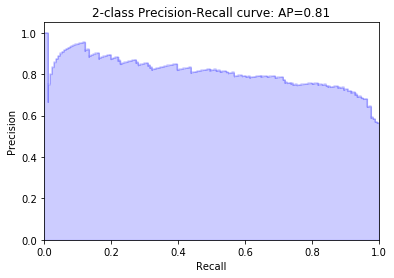

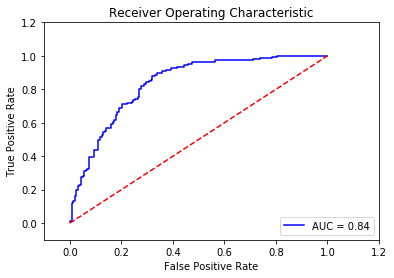

In [59]:
clf_np = lr_classifier_report(X_np_train, y_np_tr, X_np_test, y_np_te, C=1)

--------------
C=0.10
--------------
Accuracy
Train:	0.90691 
Test:	0.73353 
             precision    recall  f1-score   support

        0.0       0.74      0.70      0.72       163
        1.0       0.73      0.77      0.75       171

avg / total       0.73      0.73      0.73       334



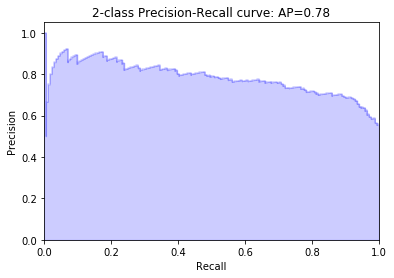

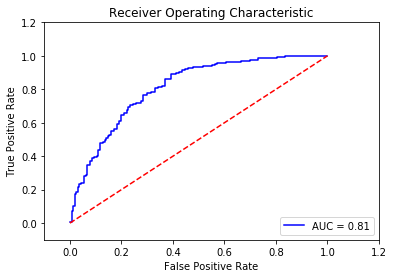

In [62]:
clf_np2 = lr_classifier_report(X_np_train, y_np_tr, X_np_test, y_np_te, C=0.1)

--------------
C=0.01
--------------
Accuracy
Train:	0.76877 
Test:	0.69162 
             precision    recall  f1-score   support

        0.0       0.69      0.66      0.68       163
        1.0       0.69      0.73      0.71       171

avg / total       0.69      0.69      0.69       334



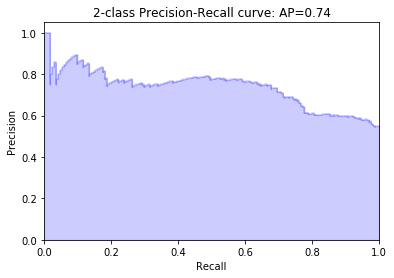

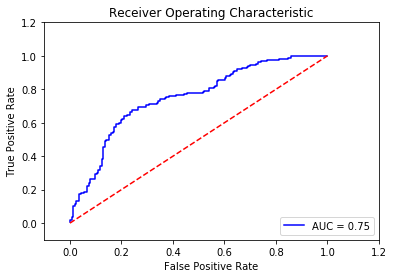

In [61]:
clf_np3 = lr_classifier_report(X_np_train, y_np_tr, X_np_test, y_np_te, C=0.01)

--------------
C=0.00
--------------
Accuracy
Train:	0.74625 
Test:	0.68563 
             precision    recall  f1-score   support

        0.0       0.68      0.66      0.67       163
        1.0       0.69      0.71      0.70       171

avg / total       0.69      0.69      0.69       334



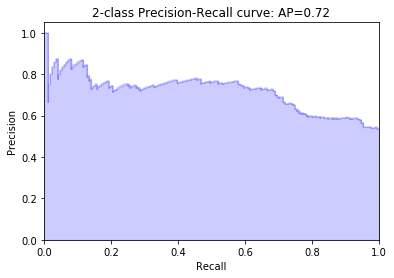

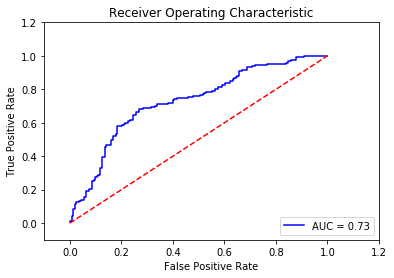

In [64]:
clf_np3 = lr_classifier_report(X_np_train, y_np_tr, X_np_test, y_np_te, C=0.001)

## P(n|related), P(p|related)

In [70]:
X_te_clean = open_pickle("./pickles/imdb_x_te_clean.pickle")
y_te = open_pickle("./pickles/imdb_y_te.pickle")

def get_sentences(corpus):
    from textblob import TextBlob
    text = TextBlob(corpus)
    i = 0
    sent = []
    for sentence in text.raw_sentences:
        sent.append(sentence)
    return sent

def nested_classifier(clf, clf_np, cv, X, threshold=None):
    y_pred = []
    for corpus in X:
    
        sentences = get_sentences(corpus)
        sentence_set = cv.transform(sentences)
        
        if threshold==None:
            y_ind = clf.predict(sentence_set)
        else:
            y_ind = clf.decision_function(sentence_set)
            y_ind = y_ind>threshold
        
        y = clf_np.predict(sentence_set[np.where(y_ind == 1), ;])
        y_pred.append(y)
    
    return y_pred



[ True  True  True False False False  True]


### Human Recognizeable Terms (1-5 grams)

## Other